In [1]:
# !pip install brewer2mpl
import numpy as np
import pandas as pd
import math
import random

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings; warnings.filterwarnings(action='once')

large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}

plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style("white")
%matplotlib inline

### Read-in tsv Data

In [2]:
import csv 

with open('/Users/ling/Desktop/Interview/DeloitteDigital/samples/samples.tsv','r') as tsv:
    data1 = [line.strip().split('\t') for line in tsv]

In [3]:
data1[0]

['b5a1fa98242d4323a9b6a6bb2ca3747f', '1']

In [4]:
df = pd.DataFrame(data1, columns=['userid', 'flag'])

In [5]:
df.head(2)

,userid,flag
0,b5a1fa98242d4323a9b6a6bb2ca3747f,1
1,89edd08ff30b454fa104a40fae11a9dc,1


In [6]:
df.describe()

,userid,flag
count,100000,100000
unique,100000,2
top,b13af6ebe73c4401b1df8df9972db390,1
freq,1,60954


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 2 columns):
userid    100000 non-null object
flag      100000 non-null object
dtypes: object(2)
memory usage: 1.5+ MB


In [8]:
df['flag'].value_counts()

1    60954
0    39046
Name: flag, dtype: int64

### Read-in custom Data

In [9]:
data2 = []
with open('/Users/ling/Desktop/Interview/DeloitteDigital/samples/samples.custom','r') as tsv:
    for line in tsv:
        line=line.replace('user_id=', '').replace('feature_9=', '\t').replace('feature_10=', '\t')
        data2.append(line.strip().split('\t'))

In [10]:
df2 = pd.DataFrame(data2, columns=['userid', 'feature_9', 'feature_10'])

In [11]:
df2[['feature_9', 'feature_10']] = df2[['feature_9', 'feature_10']].apply(pd.to_numeric)

In [12]:
df2.describe()

,feature_9,feature_10
count,100000.000000,100000.000000
mean,4.995541,0.015416
std,2.884988,5.011356
min,0.000031,-21.544749
25%,2.495061,-3.374621
50%,4.994833,0.017104
75%,7.492108,3.404650
max,9.999946,22.930922


In [13]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 3 columns):
userid        100000 non-null object
feature_9     100000 non-null float64
feature_10    100000 non-null float64
dtypes: float64(2), object(1)
memory usage: 2.3+ MB


In [14]:
data = pd.merge(df, df2, left_on=['userid'], right_on=['userid'], how='left')

In [15]:
data.head(2)

,userid,flag,feature_9,feature_10
0,b5a1fa98242d4323a9b6a6bb2ca3747f,1,1.030976,2.943784
1,89edd08ff30b454fa104a40fae11a9dc,1,4.587145,2.485351


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 4 columns):
userid        100000 non-null object
flag          100000 non-null object
feature_9     100000 non-null float64
feature_10    100000 non-null float64
dtypes: float64(2), object(2)
memory usage: 3.8+ MB


In [17]:
data['flag'].value_counts()

1    60954
0    39046
Name: flag, dtype: int64

In [18]:
data.describe()

,feature_9,feature_10
count,100000.000000,100000.000000
mean,4.995541,0.015416
std,2.884988,5.011356
min,0.000031,-21.544749
25%,2.495061,-3.374621
50%,4.994833,0.017104
75%,7.492108,3.404650
max,9.999946,22.930922


### Read-in Json Data

In [19]:
import json
lines = []

with open('/Users/ling/Desktop/Interview/DeloitteDigital/samples/samples.json','r') as handle:
    for line in handle:
        lines.append(json.loads(line))

In [20]:
lines[0]

{'feature_8': 0.04129206513750725,
 'user_id': 'b5a1fa98242d4323a9b6a6bb2ca3747f',
 'feature_2': 'C',
 'feature_3': -4.937046093832398,
 'feature_1': 3.436424754118279,
 'feature_6': 4,
 'feature_7': 9.322449813398302,
 'feature_4': 33.47386765484094,
 'feature_5': 9042.470622894587}

In [21]:
df3 = pd.DataFrame(lines)

In [22]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
feature_1    100000 non-null float64
feature_2    100000 non-null object
feature_3    100000 non-null float64
feature_4    100000 non-null float64
feature_5    100000 non-null float64
feature_6    100000 non-null int64
feature_7    100000 non-null float64
feature_8    100000 non-null float64
user_id      100000 non-null object
dtypes: float64(6), int64(1), object(2)
memory usage: 6.9+ MB


In [23]:
df3['feature_2']=df3['feature_2'].astype(str)

In [24]:
df3.groupby(['feature_2']).size()

feature_2
A    33469
B    33096
C    33435
dtype: int64

In [25]:
## Encode feature 2 
df3['feature_2_A'] = df3['feature_2']=='A'
df3['feature_2_B'] = df3['feature_2']=='B'
df3['feature_2_C'] = df3['feature_2']=='C'
del df3['feature_2']

In [26]:
df3.head(2)

,feature_1,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,user_id,feature_2_A,feature_2_B,feature_2_C
0,3.436425,-4.937046,33.473868,9042.470623,4,9.322450,0.041292,b5a1fa98242d4323a9b6a6bb2ca3747f,False,False,True
1,6.332699,3.764515,22.008889,0.063052,4,6.205812,0.003882,89edd08ff30b454fa104a40fae11a9dc,False,True,False


In [27]:
sum(df3['feature_2_A'])

33469

In [28]:
df3.groupby(['feature_6']).size()

feature_6
1    24922
2    24894
3    25113
4    25071
dtype: int64

In [29]:
## Encode feature 6
df3['feature_6_1'] = df3['feature_6']==1
df3['feature_6_2'] = df3['feature_6']==2
df3['feature_6_3'] = df3['feature_6']==3
df3['feature_6_4'] = df3['feature_6']==4
del df3['feature_6']

In [30]:
df3.head()

,feature_1,feature_3,feature_4,feature_5,feature_7,feature_8,user_id,feature_2_A,feature_2_B,feature_2_C,feature_6_1,feature_6_2,feature_6_3,feature_6_4
0,3.436425,-4.937046,33.473868,9042.470623,9.322450,0.041292,b5a1fa98242d4323a9b6a6bb2ca3747f,False,False,True,False,False,False,True
1,6.332699,3.764515,22.008889,0.063052,6.205812,0.003882,89edd08ff30b454fa104a40fae11a9dc,False,True,False,False,False,False,True
2,7.967237,0.697326,28.058075,55.860686,5.007276,0.197398,fc6d8a952bfd489da3048c4ca45168eb,True,False,False,True,False,False,False
3,4.774479,-2.106129,26.316815,0.001087,4.792960,0.000545,bd2d492dd52e4c4dbc8a7939f8fefa95,True,False,False,False,False,False,True
4,4.159423,-6.121677,18.003241,2134.946341,2.119493,60.838907,97fb36632f774a41a2f6b2544ef37a07,False,True,False,False,True,False,False


In [31]:
df3.describe()

,feature_1,feature_3,feature_4,feature_5,feature_7,feature_8
count,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,1.000000e+05
mean,4.999858,0.003450,24.999913,6.269303e+04,4.985574,7.172303e+04
std,2.887912,5.019033,4.988843,5.928176e+06,2.890469,7.168061e+06
min,0.000065,-21.129408,3.266550,2.925600e-10,0.000122,1.030077e-09
25%,2.492198,-3.371107,21.628157,3.413745e-02,2.478028,3.455138e-02
50%,4.984270,-0.019641,25.005182,9.772189e-01,4.977291,1.025767e+00
75%,7.502834,3.382617,28.351636,2.852908e+01,7.483940,2.949819e+01
max,9.999970,21.225074,47.995095,1.664545e+09,9.999884,1.969214e+09


In [32]:
sum(df3['feature_6_4'])

25071

In [33]:
data2 = pd.merge(data, df3, left_on=['userid'], right_on=['user_id'], how='left')

In [34]:
data2.head(2)

,userid,flag,feature_9,feature_10,feature_1,feature_3,feature_4,feature_5,feature_7,feature_8,user_id,feature_2_A,feature_2_B,feature_2_C,feature_6_1,feature_6_2,feature_6_3,feature_6_4
0,b5a1fa98242d4323a9b6a6bb2ca3747f,1,1.030976,2.943784,3.436425,-4.937046,33.473868,9042.470623,9.322450,0.041292,b5a1fa98242d4323a9b6a6bb2ca3747f,False,False,True,False,False,False,True
1,89edd08ff30b454fa104a40fae11a9dc,1,4.587145,2.485351,6.332699,3.764515,22.008889,0.063052,6.205812,0.003882,89edd08ff30b454fa104a40fae11a9dc,False,True,False,False,False,False,True


In [35]:
data2.describe()

,feature_9,feature_10,feature_1,feature_3,feature_4,feature_5,feature_7,feature_8
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,1.000000e+05
mean,4.995541,0.015416,4.999858,0.003450,24.999913,6.269303e+04,4.985574,7.172303e+04
std,2.884988,5.011356,2.887912,5.019033,4.988843,5.928176e+06,2.890469,7.168061e+06
min,0.000031,-21.544749,0.000065,-21.129408,3.266550,2.925600e-10,0.000122,1.030077e-09
25%,2.495061,-3.374621,2.492198,-3.371107,21.628157,3.413745e-02,2.478028,3.455138e-02
50%,4.994833,0.017104,4.984270,-0.019641,25.005182,9.772189e-01,4.977291,1.025767e+00
75%,7.492108,3.404650,7.502834,3.382617,28.351636,2.852908e+01,7.483940,2.949819e+01
max,9.999946,22.930922,9.999970,21.225074,47.995095,1.664545e+09,9.999884,1.969214e+09


In [36]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 18 columns):
userid         100000 non-null object
flag           100000 non-null object
feature_9      100000 non-null float64
feature_10     100000 non-null float64
feature_1      100000 non-null float64
feature_3      100000 non-null float64
feature_4      100000 non-null float64
feature_5      100000 non-null float64
feature_7      100000 non-null float64
feature_8      100000 non-null float64
user_id        100000 non-null object
feature_2_A    100000 non-null bool
feature_2_B    100000 non-null bool
feature_2_C    100000 non-null bool
feature_6_1    100000 non-null bool
feature_6_2    100000 non-null bool
feature_6_3    100000 non-null bool
feature_6_4    100000 non-null bool
dtypes: bool(7), float64(8), object(3)
memory usage: 9.8+ MB


### Investigate the correlation

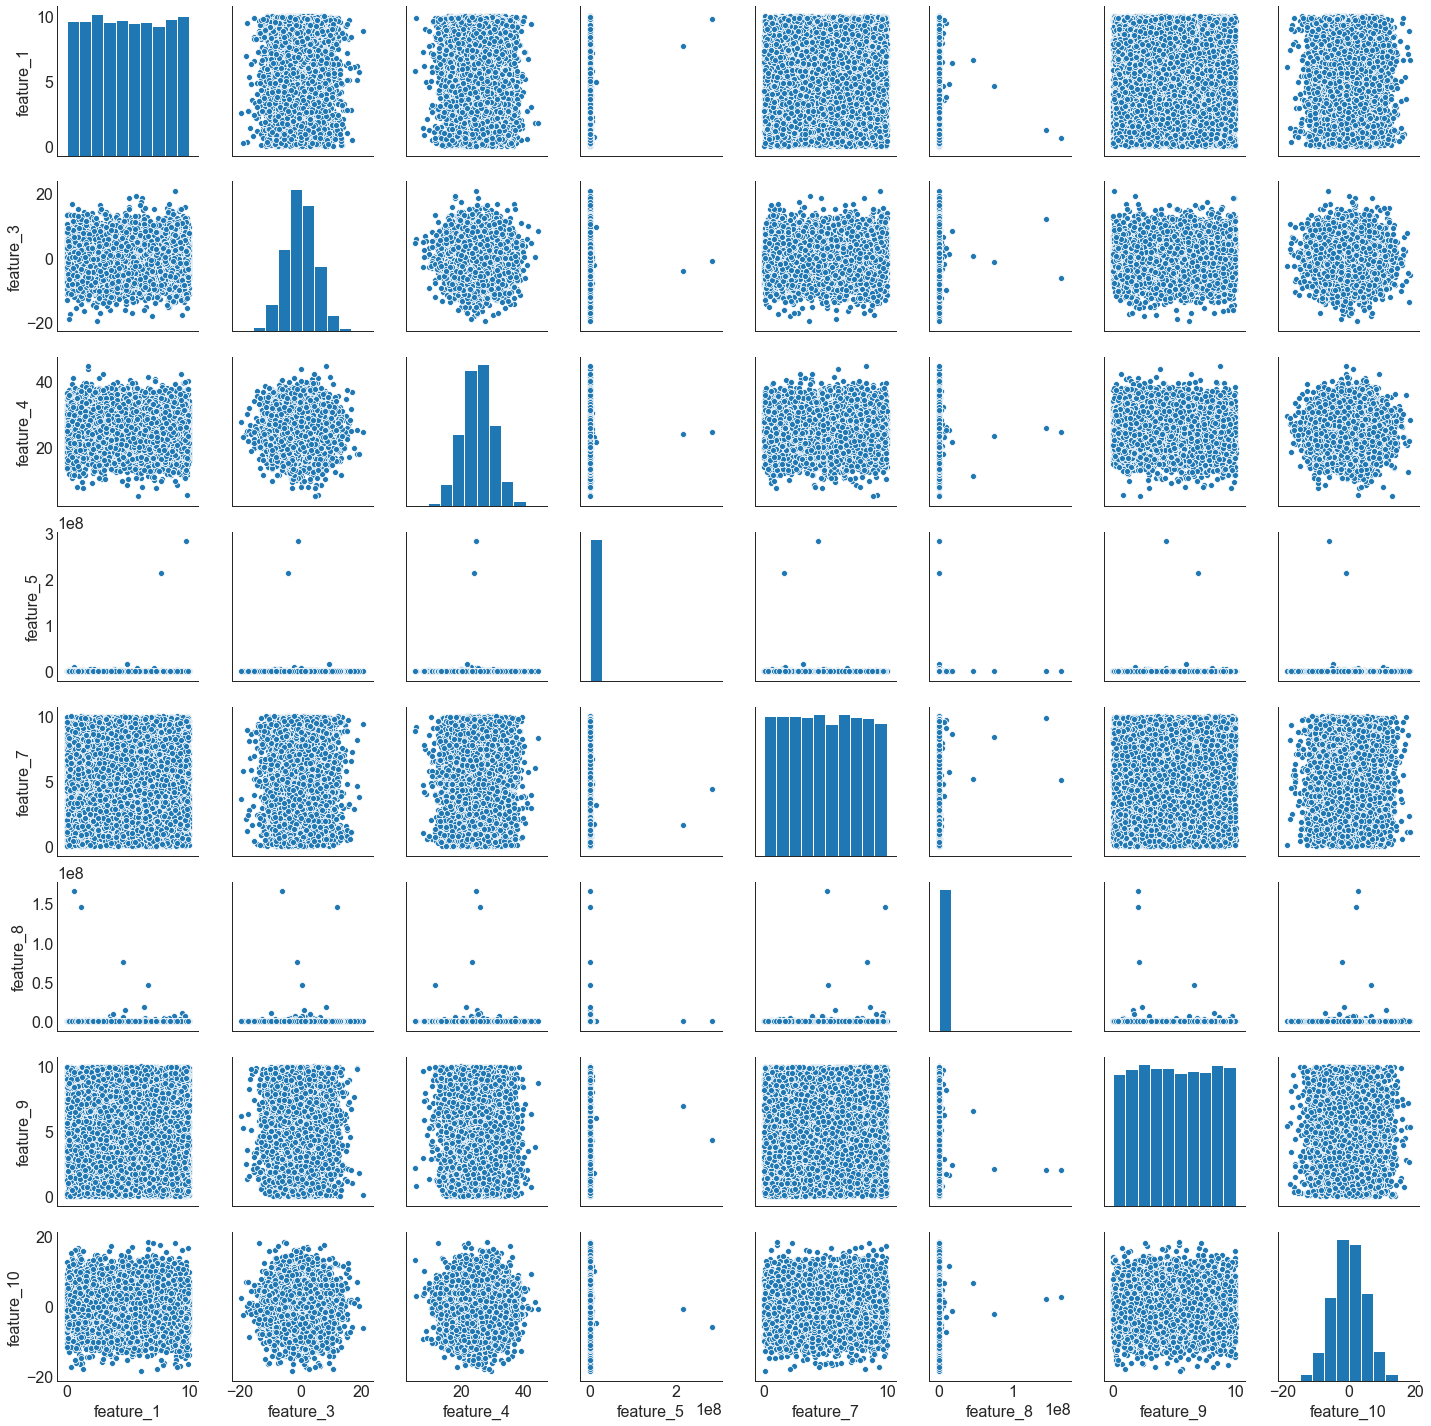

In [202]:
sns.pairplot(sample[num_attribs])

In [114]:
data2[data2['flag']=='1'].describe()

,feature_9,feature_10,feature_1,feature_3,feature_4,feature_5,feature_7,feature_8
count,60954.000000,60954.000000,60954.000000,60954.000000,60954.000000,6.095400e+04,60954.000000,6.095400e+04
mean,4.985800,0.218212,4.686556,-1.882368,25.008081,6.927648e+04,6.115623,5.950043e+04
std,2.885643,4.996740,2.872244,4.482487,5.001195,7.282244e+06,2.608942,4.223759e+06
min,0.000031,-21.318076,0.000065,-21.129408,3.266550,1.777965e-09,0.000122,1.980135e-09
25%,2.484250,-3.177379,2.174921,-4.861621,21.639675,3.417404e-02,4.196590,3.491856e-02
50%,4.979247,0.211926,4.525324,-1.847911,25.008817,9.963177e-01,6.490275,1.021698e+00
75%,7.479514,3.584891,7.109942,1.176175,28.363917,2.957904e+01,8.326634,2.884763e+01
max,9.999946,19.983080,9.999970,14.959099,47.995095,1.664545e+09,9.999884,9.004099e+08


In [115]:
data2[data2['flag']=='0'].describe()

,feature_9,feature_10,feature_1,feature_3,feature_4,feature_5,feature_7,feature_8
count,39046.000000,39046.000000,39046.000000,39046.000000,39046.000000,3.904600e+04,39046.000000,3.904600e+04
mean,5.010746,-0.301164,5.488947,2.947366,24.987162,5.241572e+04,3.221474,9.080350e+04
std,2.883938,5.017795,2.844062,4.350990,4.969536,2.686895e+06,2.380391,1.018540e+07
min,0.000059,-21.544749,0.000148,-14.388676,5.682355,2.925600e-10,0.000262,1.030077e-09
25%,2.513997,-3.677574,3.096121,-0.061389,21.609354,3.407889e-02,1.262407,3.404413e-02
50%,5.022605,-0.281572,5.729932,2.872806,24.999514,9.517857e-01,2.732107,1.032028e+00
75%,7.513282,3.101478,7.984453,5.850508,28.330785,2.690916e+01,4.751870,3.040322e+01
max,9.999913,22.930922,9.999903,21.225074,44.600801,2.830774e+08,9.999658,1.969214e+09


In [117]:
data2.head()

,userid,flag,feature_9,feature_10,feature_1,feature_3,feature_4,feature_5,feature_7,feature_8,user_id,feature_2_A,feature_2_B,feature_2_C,feature_6_1,feature_6_2,feature_6_3,feature_6_4
0,b5a1fa98242d4323a9b6a6bb2ca3747f,1,1.030976,2.943784,3.436425,-4.937046,33.473868,9042.470623,9.322450,0.041292,b5a1fa98242d4323a9b6a6bb2ca3747f,False,False,True,False,False,False,True
1,89edd08ff30b454fa104a40fae11a9dc,1,4.587145,2.485351,6.332699,3.764515,22.008889,0.063052,6.205812,0.003882,89edd08ff30b454fa104a40fae11a9dc,False,True,False,False,False,False,True
2,fc6d8a952bfd489da3048c4ca45168eb,0,7.224021,3.397376,7.967237,0.697326,28.058075,55.860686,5.007276,0.197398,fc6d8a952bfd489da3048c4ca45168eb,True,False,False,True,False,False,False
3,bd2d492dd52e4c4dbc8a7939f8fefa95,1,8.285427,11.201489,4.774479,-2.106129,26.316815,0.001087,4.792960,0.000545,bd2d492dd52e4c4dbc8a7939f8fefa95,True,False,False,False,False,False,True
4,97fb36632f774a41a2f6b2544ef37a07,1,3.449477,7.423531,4.159423,-6.121677,18.003241,2134.946341,2.119493,60.838907,97fb36632f774a41a2f6b2544ef37a07,False,True,False,False,True,False,False


In [147]:
y = data2['flag'].apply(lambda x: 1 if x=='1' else -1)

In [148]:
from numpy import dot
from numpy.linalg import norm

for col in ['feature_2_A', 'feature_2_B', 'feature_2_C', 'feature_6_1', 'feature_6_2', 'feature_6_3', 'feature_6_4']:
    x = data2[col].apply(lambda s: 1 if s==True else -1)
    cos_sim = dot(x, y)/(norm(x)*norm(y))
    print([col, cos_sim])

['feature_2_A', -0.07373999999999999]
['feature_2_B', -0.07271999999999999]
['feature_2_C', -0.07261999999999999]
['feature_6_1', -0.11175999999999998]
['feature_6_2', -0.11295999999999998]
['feature_6_3', -0.10457999999999998]
['feature_6_4', -0.10885999999999998]


### Split the data set

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
train_set, test_set = train_test_split(data2, test_size=0.3, random_state=42)

In [40]:
y_train = (train_set['flag']=='1')
y_train.describe()

count     70000
unique        2
top        True
freq      42678
Name: flag, dtype: object

In [41]:
y_test = (test_set['flag']=='1')
y_test.describe()

count     30000
unique        2
top        True
freq      18276
Name: flag, dtype: object

In [42]:
train_set.head(2)

,userid,flag,feature_9,feature_10,feature_1,feature_3,feature_4,feature_5,feature_7,feature_8,user_id,feature_2_A,feature_2_B,feature_2_C,feature_6_1,feature_6_2,feature_6_3,feature_6_4
76513,02e2087b733841598d973b3359381cb1,0,1.07377,6.634492,7.796231,5.219895,28.548998,0.132061,0.011658,0.052302,02e2087b733841598d973b3359381cb1,False,True,False,False,False,False,True
60406,5aa6c9ccd29f4f7a96b521728017702e,0,5.27030,-2.809399,5.567067,10.563132,22.086731,0.118295,7.380809,34.411306,5aa6c9ccd29f4f7a96b521728017702e,False,True,False,False,True,False,False


In [43]:
del_attribs =[
 'user_id',
 'userid',
 'flag'
]
train_set = train_set.drop(del_attribs, 1)
train_set.head()

,feature_9,feature_10,feature_1,feature_3,feature_4,feature_5,feature_7,feature_8,feature_2_A,feature_2_B,feature_2_C,feature_6_1,feature_6_2,feature_6_3,feature_6_4
76513,1.073770,6.634492,7.796231,5.219895,28.548998,0.132061,0.011658,0.052302,False,True,False,False,False,False,True
60406,5.270300,-2.809399,5.567067,10.563132,22.086731,0.118295,7.380809,34.411306,False,True,False,False,True,False,False
27322,5.917325,-1.484684,2.884219,2.968758,31.350533,0.037378,5.825038,17.948562,True,False,False,False,False,False,True
53699,0.593417,7.407206,8.391352,-7.467073,22.670669,0.806055,9.047173,0.000006,False,True,False,True,False,False,False
65412,1.784886,1.228149,3.365291,-7.920174,36.518237,8.729999,4.800059,694.987691,False,True,False,False,False,True,False


In [44]:
test_set = test_set.drop(del_attribs, 1)
test_set.head()

,feature_9,feature_10,feature_1,feature_3,feature_4,feature_5,feature_7,feature_8,feature_2_A,feature_2_B,feature_2_C,feature_6_1,feature_6_2,feature_6_3,feature_6_4
75721,8.419848,4.265974,4.129579,1.767999,39.693715,60573.317269,3.891391,1.809594,False,True,False,False,True,False,False
80184,0.554361,1.024376,2.748271,-0.623929,22.323657,3.587754,9.042950,26.366159,False,False,True,True,False,False,False
19864,1.493106,-2.337420,4.807461,-6.459061,27.319431,0.378383,9.024792,8890.632488,True,False,False,False,False,True,False
76699,8.864291,0.225955,3.578743,-7.863994,33.480773,0.001019,8.464519,223.735812,False,True,False,False,True,False,False
92991,2.864448,-3.981735,0.752696,-2.441660,28.191915,1113.914356,6.081680,0.211931,False,True,False,False,False,True,False


In [45]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import roc_curve

import matplotlib.pyplot as plt

In [46]:
def display_scores(obs, pred):
    precision=precision_score(obs, pred)
    recall=recall_score(obs, pred)
    f1=f1_score(obs, pred)
    print("precision", precision)
    print("recall", recall)
    print("f1", f1)

In [47]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

### Decision Tree

In [48]:
from sklearn.tree import DecisionTreeClassifier

In [49]:
tree_clf = DecisionTreeClassifier(max_depth=4)
tree_clf.fit(train_set, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [50]:
y_train_pred = cross_val_predict(tree_clf, train_set, y_train, cv=10)
y_test_pred = cross_val_predict(tree_clf, test_set, y_test, cv=10)

In [51]:
from sklearn.tree import export_graphviz

In [52]:
attrib=list(train_set)
export_graphviz(
        tree_clf,
        out_file="tree_clf1.dot",
        feature_names=attrib,
        rounded=True,
        filled=True
    )

In [53]:
!dot -Tpng tree_clf1.dot -o tree_clf1.png

In [54]:
display_scores(y_train, y_train_pred)

precision 0.8755013120760509
recall 0.8286470781198744
f1 0.8514300847457626


In [55]:
display_scores(y_test, y_test_pred)

precision 0.8443224410072322
recall 0.8751367914204421
f1 0.8594535049302775


In [56]:
y_train=0+np.array(y_train)
y_train_pred=0+np.array(y_train_pred)
fpr, tpr, thresholds = roc_curve(y_train, y_train_pred)

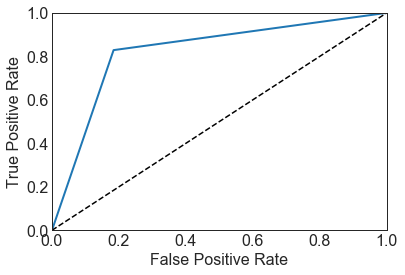

In [57]:
plot_roc_curve(fpr, tpr)
plt.show()

In [58]:
roc_auc_score(y_train, y_train_pred)

0.8222914769854185

In [59]:
y_test=0+np.array(y_test)
y_test_pred=0+np.array(y_test_pred)
roc_auc_score(y_test, y_test_pred)

0.8118007396201493

### Random Forest

In [60]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(n_estimators=50, 
            max_depth=5, max_features = 10,
            n_jobs=-1, random_state=42)
forest_clf.fit(train_set, y_train)

/Users/ling/miniconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features=10, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [61]:
y_train_pred = cross_val_predict(forest_clf, train_set, y_train, cv=10)
y_test_pred = cross_val_predict(forest_clf, test_set, y_test, cv=10)

In [62]:
display_scores(y_train, y_train_pred)

precision 0.8600887674974393
recall 0.8854210600309292
f1 0.8725710920993383


In [63]:
display_scores(y_test, y_test_pred)

precision 0.8544214117029652
recall 0.8908404464871963
f1 0.8722509442554446


In [64]:
y_train=0+np.array(y_train)
y_train_pred=0+np.array(y_train_pred)
fpr, tpr, thresholds = roc_curve(y_train, y_train_pred)

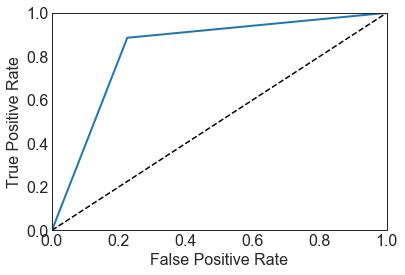

In [65]:
plot_roc_curve(fpr, tpr)
plt.show()

In [66]:
roc_auc_score(y_train, y_train_pred)

0.8302187651373445

In [67]:
y_test=0+np.array(y_test)
y_test_pred=0+np.array(y_test_pred)
roc_auc_score(y_test, y_test_pred)

0.8271158902514454

In [68]:
attrib=list(train_set)
pd.DataFrame({'feature':attrib,'coef':forest_clf.feature_importances_}).sort_values(by='coef', ascending=False)

,feature,coef
6,feature_7,0.489712
3,feature_3,0.483370
2,feature_1,0.026140
1,feature_10,0.000611
0,feature_9,0.000065
4,feature_4,0.000057
5,feature_5,0.000026
7,feature_8,0.000021
8,feature_2_A,0.000000
9,feature_2_B,0.000000


### LightGBM

In [226]:
import sys
!conda install --yes --prefix {sys.prefix} -c conda-forge lightgbm

Solving environment: done

## Package Plan ##

  environment location: /Users/ling/miniconda3

  added / updated specs:
    - lightgbm


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2019.3.9   |       hecc5488_0         146 KB  conda-forge
    certifi-2019.3.9           |           py37_0         149 KB  conda-forge
    clangdev-4.0.0             |        default_0        62.8 MB  conda-forge
    conda-4.6.8                |           py37_0         877 KB  conda-forge
    lightgbm-2.2.2             |   py37h0a44026_0         648 KB  conda-forge
    llvmdev-4.0.0              |        default_0       100.9 MB  conda-forge
    openmp-4.0.0               |                1         195 KB  conda-forge
    openssl-1.1.1b             |       h1de35cc_1         3.5 MB  conda-forge
    ------------------------------------------------------------
                              

In [70]:
import lightgbm as lgb

In [77]:
param = {'num_leaves':20, 'num_trees':100, 'objective':'binary'}
param['metric'] = ['auc', 'binary_logloss']

In [78]:
lgb_train = lgb.Dataset(train_set, y_train)
lgb_eval = lgb.Dataset(test_set, y_test, reference=lgb_train)

num_round = 100
bst = lgb.train(param, lgb_train, num_round, valid_sets=[lgb_eval])

[1]	valid_0's binary_logloss: 0.622338	valid_0's auc: 0.897551
[2]	valid_0's binary_logloss: 0.584361	valid_0's auc: 0.901556
[3]	valid_0's binary_logloss: 0.552587	valid_0's auc: 0.907328
[4]	valid_0's binary_logloss: 0.525881	valid_0's auc: 0.909866
[5]	valid_0's binary_logloss: 0.503202	valid_0's auc: 0.911524
[6]	valid_0's binary_logloss: 0.484108	valid_0's auc: 0.912648
[7]	valid_0's binary_logloss: 0.467288	valid_0's auc: 0.913708
[8]	valid_0's binary_logloss: 0.452907	valid_0's auc: 0.914236
[9]	valid_0's binary_logloss: 0.440378	valid_0's auc: 0.914818
[10]	valid_0's binary_logloss: 0.429389	valid_0's auc: 0.915396
[11]	valid_0's binary_logloss: 0.419848	valid_0's auc: 0.915777
[12]	valid_0's binary_logloss: 0.411557	valid_0's auc: 0.916386
[13]	valid_0's binary_logloss: 0.404129	valid_0's auc: 0.916902
[14]	valid_0's binary_logloss: 0.397773	valid_0's auc: 0.917181
[15]	valid_0's binary_logloss: 0.391944	valid_0's auc: 0.91759
[16]	valid_0's binary_logloss: 0.387004	valid_0's 

In [79]:
pd.DataFrame({'feature': bst.feature_name(),'importances':list(bst.feature_importance())}).sort_values(by='importances', ascending=False)

,feature,importances
3,feature_3,510
6,feature_7,408
2,feature_1,320
1,feature_10,213
4,feature_4,132
0,feature_9,97
5,feature_5,96
7,feature_8,82
11,feature_6_1,10
12,feature_6_2,10


In [108]:
gbm_clf = lgb.LGBMClassifier(
    boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.05, max_depth=-1,
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=100, n_jobs=-1, num_leaves=20, objective='binary',
        random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0
)

In [109]:
y_train_pred = cross_val_predict(gbm_clf, train_set, y_train, cv=10)
y_test_pred = cross_val_predict(gbm_clf, test_set, y_test, cv=10)

In [110]:
display_scores(y_train, y_train_pred)

precision 0.8667676698115373
recall 0.8847415530249777
f1 0.8756623879593233


In [111]:
display_scores(y_test, y_test_pred)

precision 0.8625511777529643
recall 0.8876121689647626
f1 0.8749022463123265


In [112]:
y_train=0+np.array(y_train)
y_train_pred=0+np.array(y_train_pred)
fpr, tpr, thresholds = roc_curve(y_train, y_train_pred)
roc_auc_score(y_train, y_train_pred)

0.8361560045338636

In [113]:
y_test=0+np.array(y_test)
y_test_pred=0+np.array(y_test_pred)
roc_auc_score(y_test, y_test_pred)

0.8335621404359808